### Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.utils import shuffle
import glob

### Fetch the training data

In [4]:
pwd

'C:\\Users\\DELL\\Desktop\\Edure\\Shefin\\Capstone Projects\\Deep Learning\\Deep learning Capstone projects\\Deep learning Capstone projects\\Hurricane Damage Detection'

In [6]:
damage = glob.glob('test/damage/*.jpeg')
no_damage = glob.glob('test/no_damage/*.jpeg')

In [7]:
len(damage)

1000

In [8]:
len(no_damage)

1000

### Fetch the testing data

In [10]:
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

In [11]:
len(damage_test)

2370

In [12]:
len(no_damage_test)

1000

### Find the number of images in the Training and Testing set

In [14]:
print(f'Number of images in Training set are\nDamage:{len(damage)}')
print(f'No Damage:{len(no_damage)}')
print(f'Damage test:{len(damage_test)}')
print(f'No Damage test:{len(no_damage_test)}')

Number of images in Training set are
Damage:1000
No Damage:1000
Damage test:2370
No Damage test:1000


### Store all the images inside a list and create a list with the corresponding labels

## For Training set

In [20]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

### For Testing set

In [22]:
image_test = []
label_test = []

for i in damage:
    img = plt.imread(i)  
    image_test.append(img)
    label_test.append(0)

for i in no_damage:
    img = plt.imread(i) 
    image_test.append(img)
    label_test.append(1)

### Shuffle both image list and label list (In both Training and testing set)

In [24]:
image, label = shuffle(image, label, random_state=100)

In [25]:
image_test, label_test = shuffle(image_test, label_test)

In [26]:
len(label)

2000

In [27]:
len(label_test)

2000

### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

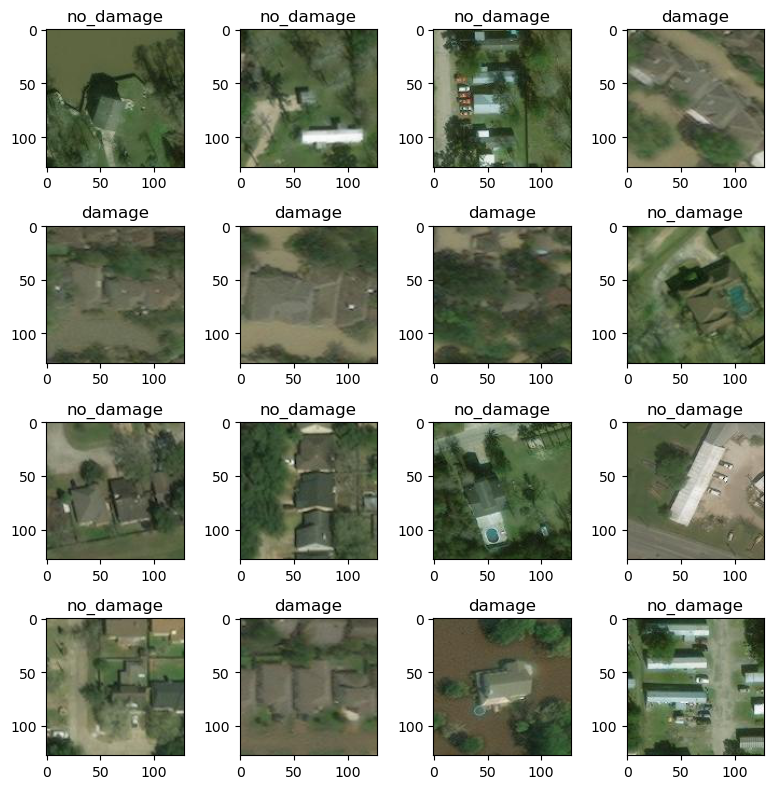

In [29]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

### Reshape the images both training and testing set

In [34]:
x_train = []
for i in image:
    x_train.append(resize(i,(224,224,3)))
x_train = np.array(x_train)

In [35]:
x_test = []
for i in image:
    x_test.append(resize(i, (224,224,3)))
x_test = np.array(x_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [37]:
y_train = np.array(label)
y_test = np.array(label_test)

### Plot some of our reshaped images

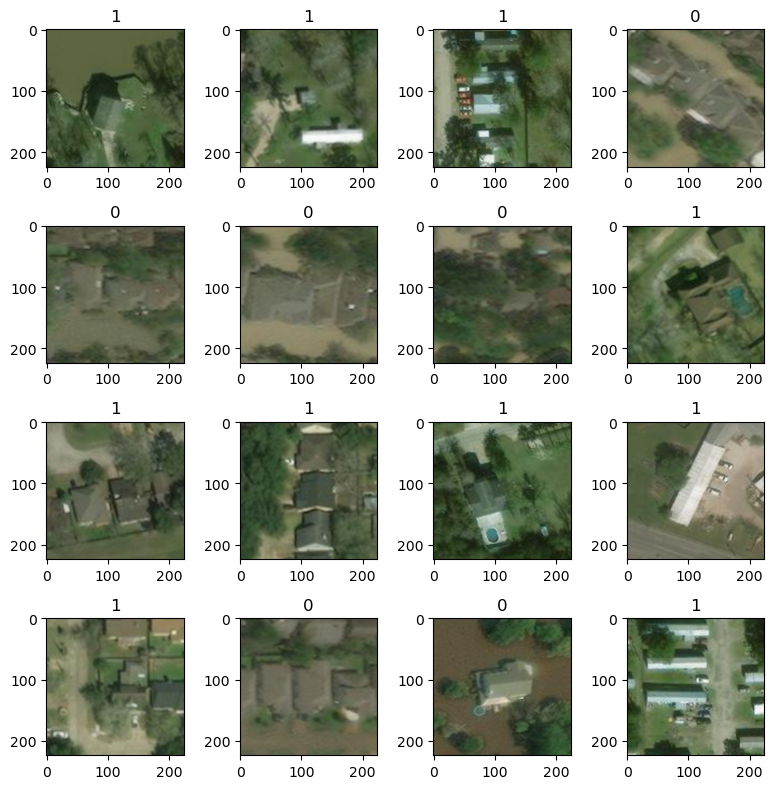

In [40]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i])
    plt.title(label[i])
    plt.tight_layout()

### Check the shape of x_train and x_test and y_train and y_test

In [42]:
print(f"Shape of Xtrain is:", x_train.shape)
print(f"Shape of Xtest is:", x_test.shape)
print(f"Shape of ytrain is:", y_train.shape)
print(f"Shape of ytest is:", y_test.shape)

Shape of Xtrain is: (2000, 224, 224, 3)
Shape of Xtest is: (2000, 224, 224, 3)
Shape of ytrain is: (2000,)
Shape of ytest is: (2000,)


### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [44]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')        
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [46]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Check the summary of our model

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [50]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.5023 - loss: 1.2836 - val_accuracy: 0.6700 - val_loss: 0.6338
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 377ms/step - accuracy: 0.6336 - loss: 0.6244 - val_accuracy: 0.7150 - val_loss: 0.5812
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 514ms/step - accuracy: 0.8146 - loss: 0.4748 - val_accuracy: 0.7100 - val_loss: 0.5535
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step - accuracy: 0.8625 - loss: 0.3630 - val_accuracy: 0.8000 - val_loss: 0.4388
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - accuracy: 0.9277 - loss: 0.2332 - val_accuracy: 0.8600 - val_loss: 0.3753
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.9573 - loss: 0.1517 - val_accuracy: 0.8700 - val_loss: 0.3737
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9679 - loss: 0.1231 - val_accuracy: 0.8700 - val_loss: 0.4083
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 356ms/step - accuracy: 0.9811 - loss: 0.0769 - val_accu

### Evaluate the model

In [52]:
model.evaluate(x_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9923 - loss: 0.0323


[0.08659009635448456, 0.9794999957084656]

### Make predictions with x_test

In [54]:
ypred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step


### Store the values in a list Use np.argmax

In [56]:
ypred = ypred.argmax(axis=1)

### Plot x_test with label from our prediction

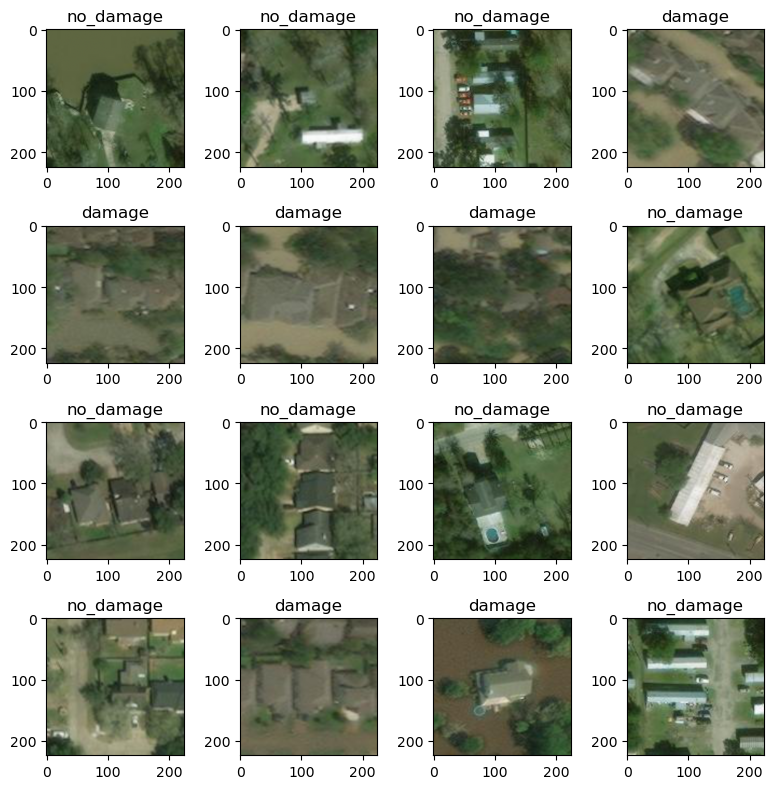

In [58]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

### Visualise confusion matrix on a heatmap

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

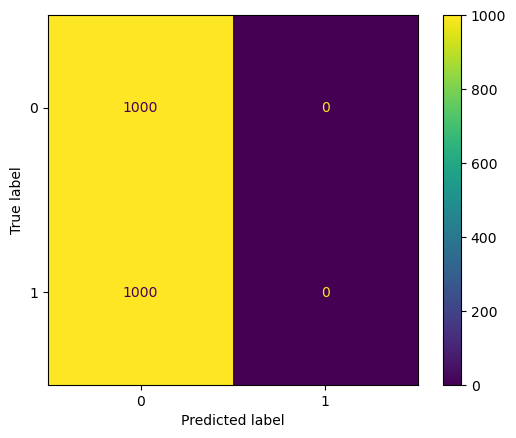

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, ypred)

***